In [1]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

class DDRDataset(Dataset):
    def __init__(self, annotations_file="./data/DR_grading/train.txt", img_dir="./data/DR_grading/train/", transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, delimiter=" ")
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [2]:
ddr = DDRDataset()

In [3]:
import matplotlib.pyplot as plt

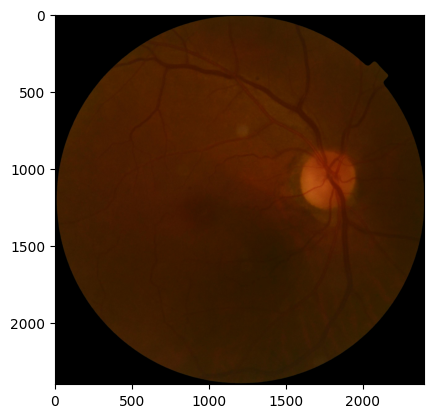

In [4]:
img = ddr.__getitem__(3)[0].numpy()

plt.imshow(img.transpose(1, 2, 0))

In [5]:
from torch.utils.data import DataLoader
from torchvision import transforms

class DDRDataLoader(DataLoader):
    """
    Data Loader for DR Grading Score from DDR
    """
    def __init__(self, dataset, batch_size=16, shuffle=True, num_workers=1, training=True):

        self.shuffle = shuffle
        self.n_samples = len(dataset)

        self.init_kwargs = {
            'dataset': dataset,
            'batch_size': batch_size,
            'shuffle': self.shuffle,
            'num_workers': num_workers
        }
        super().__init__(**self.init_kwargs)



In [10]:
# we should write preprocessing and augmentation outside from Datasets using transforms.Compose

transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.RandomRotation((-60,60)) # possibly not interesting
    # other pertinent augmentations
])

dataset = DDRDataset(transform=transform)

data_loader = DDRDataLoader(dataset)

0
torch.Size([16, 3, 500, 500])


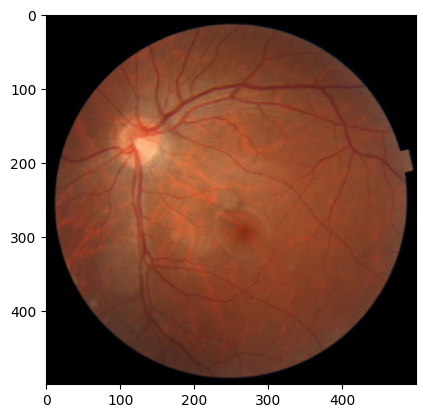

In [14]:
# testing (randomness, shape, plotting)
# beware of dimensions: (B, C, H, W)
for batch_idx, (data, target) in enumerate(data_loader):
    print(batch_idx)
    print(data.shape)
    # the following transpose should fix dimension to (H,W,C) to plot the image
    plt.imshow(data[0].numpy().transpose(1, 2, 0))  
    break

0
torch.Size([16, 3, 500, 500])


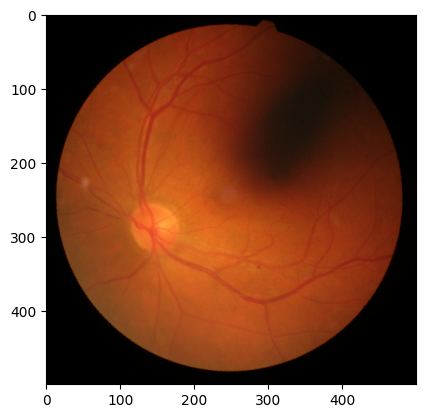

In [19]:
import torch, numpy as np

SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

# testing again, fixed seed
for batch_idx, (data, target) in enumerate(data_loader):
    print(batch_idx)
    print(data.shape)
    plt.imshow(data[0].numpy().transpose(1, 2, 0))  
    break